# Car Price Data Exploration

This notebook explores the car price data from Le Bon Coin using Polars for efficient data processing. The data is stored in multiple CSV files in `/Users/brunobrumbrum/Documents/data/le_boncoin_13_oct_2025`.

## Objectives:
- Load and explore all CSV files from the data directory
- Analyze data structure, quality, and patterns
- Generate visualizations for better understanding
- Optimize memory usage with Polars

## 1. Setup Environment and Imports

Import necessary libraries including Polars, matplotlib, seaborn, and pathlib for data processing and visualization.

In [1]:
# Core data processing libraries
import polars as pl
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Path and file handling
from pathlib import Path
import glob
import os
import sys

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Add project root to Python path for module imports
current_dir = Path.cwd()
project_root = current_dir.parent if current_dir.name == "notebooks" else current_dir
sys.path.insert(0, str(project_root))

from src.config import DATA_PATH, PROCESSED_DATA_PATH, MODELS_PATH

## 3. Read CSV Files from Data Directory

Use Polars to read all CSV files from the specified directory with `infer_schema_length=0` for faster loading.

In [2]:
# Define data directory
data_dir = Path(os.path.join(DATA_PATH, "le_boncoin_13_oct_2025"))
# Find all CSV files
csv_files = list(data_dir.glob("*.csv"))

In [3]:
# Read all CSV files using Polars with fast loading
dataframes = {}
total_rows = 0

print("📥 Loading CSV files with Polars...")
print("-" * 50)

for file_path in csv_files:
    try:
        df = pl.read_csv(
            file_path,
            infer_schema_length=0,
            #encoding="utf8",
        )
        
        dataframes[file_path.stem] = df
        rows = df.height
        cols = df.width
        total_rows += rows
        
        print(f"✅ {file_path.name}: {rows:,} rows × {cols} columns")
        
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

print("-" * 50)
print(f"📊 Total datasets loaded: {len(dataframes)}")
print(f"📊 Total rows across all files: {total_rows:,}")

# Show memory usage
memory_usage = sum(df.estimated_size("mb") for df in dataframes.values())
print(f"💾 Estimated memory usage: {memory_usage:.2f} MB")

📥 Loading CSV files with Polars...
--------------------------------------------------
✅ DELAGE.csv: 4 rows × 35 columns
✅ GENERAL MOTORS.csv: 71 rows × 35 columns
✅ AUSTIN.csv: 282 rows × 35 columns
✅ PIAGGIO.csv: 18 rows × 35 columns
✅ MERCURY.csv: 18 rows × 35 columns
✅ LINCOLN.csv: 39 rows × 35 columns
✅ TRABANT.csv: 5 rows × 35 columns
✅ DAF.csv: 8 rows × 35 columns
✅ LAMBORGHINI.csv: 278 rows × 35 columns
✅ BERTONE.csv: 6 rows × 35 columns
✅ DACIA.csv: 18,670 rows × 35 columns
✅ SUZUKI.csv: 4,668 rows × 35 columns
✅ CASALINI.csv: 79 rows × 35 columns
✅ OPEL.csv: 19,869 rows × 35 columns
✅ LEAPMOTOR.csv: 146 rows × 35 columns
✅ GENESIS.csv: 2 rows × 35 columns
✅ ALFA ROMEO.csv: 4,539 rows × 35 columns
✅ BYD.csv: 434 rows × 35 columns
✅ PORSCHE.csv: 10,838 rows × 35 columns
✅ MORGAN.csv: 143 rows × 35 columns
✅ KIA.csv: 10,345 rows × 35 columns
✅ BMW.csv: 48,326 rows × 35 columns
✅ UMM.csv: 4 rows × 35 columns
✅ HUMMER.csv: 92 rows × 35 columns
✅ SILENCE.csv: 3 rows × 35 columns
✅ H

## 4. Data Schema and Structure Analysis

Examine the schema, column names, data types, and structure of the datasets.

In [4]:
df = pl.concat(dataframes.values(), how="vertical")

print(df.shape)
df.head(3)

(732427, 35)


url,first_publication_date,index_date,price,marque,modele,annee_modele,kilometrage,energie,boite_de_vitesse,nombre_de_portes,nombre_de_place_s,version_constructeur,date_de_premiere_mise_en_circulation,type_de_vehicule,couleur,crit_air,puissance_fiscale,puissance_din,permis,reference,duree_de_disponibilite_des_pieces_detachees,pays,id_region,region,id_departement,departement,ville_affichee,ville,code_postal,latitude,longitude,source,fournisseur,forme_existante
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""https://www.leboncoin.fr/ad/vo…","""2025-09-01 15:37:26""","""2025-10-08 18:28:10""","""24900 €""","""DELAGE""","""D4""","""1960""","""15000 km""","""Essence""","""Manuelle""","""4""","""4""",null,"""01/1935""","""Berline""","""Beige""",null,"""8 Cv""",null,"""Avec permis""",null,null,"""FR""","""3""","""Auvergne""","""63""","""Puy-de-Dôme""","""Romagnat 63540 Opme""","""Romagnat""","""63540""","""45.70758""","""3.08908""","""city""","""here""","""True"""
"""https://www.leboncoin.fr/ad/vo…","""2025-10-06 19:02:42""","""2025-10-06 19:02:42""","""39000 €""","""DELAGE""","""DI""","""1960""","""43000 km""","""Essence""","""Manuelle""","""4""","""6""",null,"""01/1924""","""Cabriolet""",null,null,"""11 Cv""","""35 Ch""","""Avec permis""",null,null,"""FR""","""17""","""Nord-Pas-de-Calais""","""62""","""Pas-de-Calais""","""La Couture 62136""","""La Couture""","""62136""","""50.58426""","""2.70473""","""city""","""here""","""True"""
"""https://www.leboncoin.fr/ad/vo…","""2025-09-30 20:16:40""","""2025-09-30 20:16:40""","""18000 €""","""DELAGE""","""DI""","""1960""","""120000 km""","""Essence""","""Manuelle""","""4""","""5""",null,"""01/1936""","""Berline""","""Bleu""",null,"""12 Cv""","""80 Ch""","""Avec permis""",null,null,"""FR""","""17""","""Nord-Pas-de-Calais""","""59""","""Nord""","""Rousies 59131""","""Rousies""","""59131""","""50.27274""","""4.00581""","""city""","""here""","""True"""


## 5. Focus on Modeling Variables

Now let's analyze the key variables for car price prediction:
- **Target variable**: `price`
- **Features**: `marque`, `modele`, `annee_modele`, `kilometrage`

In [5]:
# Define modeling variables
TARGET_VAR = 'price'
FEATURE_VARS = ['marque', 'modele', 'annee_modele', 'kilometrage']
MODEL_VARS = [TARGET_VAR] + FEATURE_VARS

In [6]:
# Analyze each modeling variable
print("\n🔍 VARIABLE-BY-VARIABLE ANALYSIS")
print("=" * 50)

for var in MODEL_VARS:
    print(f"\n📋 Variable: {var}")
    print(f"   Data type: {df[var].dtype}")
    print(f"   Non-null count: {df[var].count():,}")
    print(f"   Null count: {df[var].null_count():,}")
    null_pct = (df[var].null_count() / df.height) * 100
    print(f"   Missing %: {null_pct:.2f}%")
    
    # Show unique values for categorical variables
    if var in ['marque', 'modele']:
        unique_count = df[var].n_unique()
        print(f"   Unique values: {unique_count:,}")
        if unique_count <= 20:
            unique_vals = df[var].unique().drop_nulls().to_list()
            print(f"   Values: {unique_vals}")
        else:
            top_vals = df[var].value_counts(sort = True).head(10)
            print(f"   Top 10 values:")
            for i in range(min(10, top_vals.height)):
                val = top_vals[var][i]
                count = top_vals['count'][i]
                print(f"     - {val}: {count:,}")
    
    # Show statistics for numeric variables
    elif var in ['price', 'annee_modele', 'kilometrage']:
        try:
            # Try to convert to numeric if it's string
            if df[var].dtype == pl.String:
                numeric_df = df.with_columns(pl.col(var).str.replace_all(",", "").cast(pl.Float64, strict=False))
                var_clean = numeric_df[var].drop_nulls()
            else:
                var_clean = df[var].drop_nulls()
            
            if var_clean.len() > 0:
                stats = var_clean.describe()
                print(f"   Statistics:")
                for stat_row in stats.iter_rows():
                    stat_name = stat_row[0]
                    stat_value = stat_row[1]
                    if stat_name in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']:
                        print(f"     {stat_name}: {stat_value:,.0f}" if not pd.isna(stat_value) else f"     {stat_name}: N/A")
        except Exception as e:
            print(f"   Could not compute statistics: {e}")
    
    print("-" * 30)


🔍 VARIABLE-BY-VARIABLE ANALYSIS

📋 Variable: price
   Data type: String
   Non-null count: 732,427
   Null count: 0
   Missing %: 0.00%
------------------------------

📋 Variable: marque
   Data type: String
   Non-null count: 732,427
   Null count: 0
   Missing %: 0.00%
   Unique values: 146
   Top 10 values:
     - PEUGEOT: 110,246
     - RENAULT: 97,196
     - CITROEN: 63,678
     - VOLKSWAGEN: 57,737
     - BMW: 48,326
     - MERCEDES-BENZ: 44,071
     - AUDI: 43,577
     - FORD: 28,610
     - OPEL: 19,869
     - TOYOTA: 19,736
------------------------------

📋 Variable: modele
   Data type: String
   Non-null count: 732,427
   Null count: 0
   Missing %: 0.00%
   Unique values: 1,661
   Top 10 values:
     - Clio: 25,469
     - 208: 23,513
     - 308: 18,322
     - Golf: 16,806
     - 3008: 16,764
     - C3: 16,665
     - 2008: 15,064
     - Megane: 14,504
     - Captur: 11,093
     - Polo: 10,406
------------------------------

📋 Variable: annee_modele
   Data type: String
   No

In [7]:
# clan price variable
df = df.with_columns([
    # This part is fine
    pl.col('price').str.extract(r'(\D+)$').alias('currency'),
    
    # --- Corrected logic for price_cleaned ---
    pl.when(pl.col('price').str.replace_all(r'[^\d.]', '') == "")
        .then(None) # If the cleaned string is empty, replace it with null
        .otherwise(pl.col('price').str.replace_all(r'[^\d.]', '')) # Otherwise, keep the cleaned string
        .cast(pl.Float64) # Now, cast to float. Nulls are handled gracefully.
        .alias('price_numeric')
])

In [49]:
price_clean = df

price_data = price_clean['price_numeric'].drop_nulls()


📈 TARGET VARIABLE ANALYSIS: PRICE


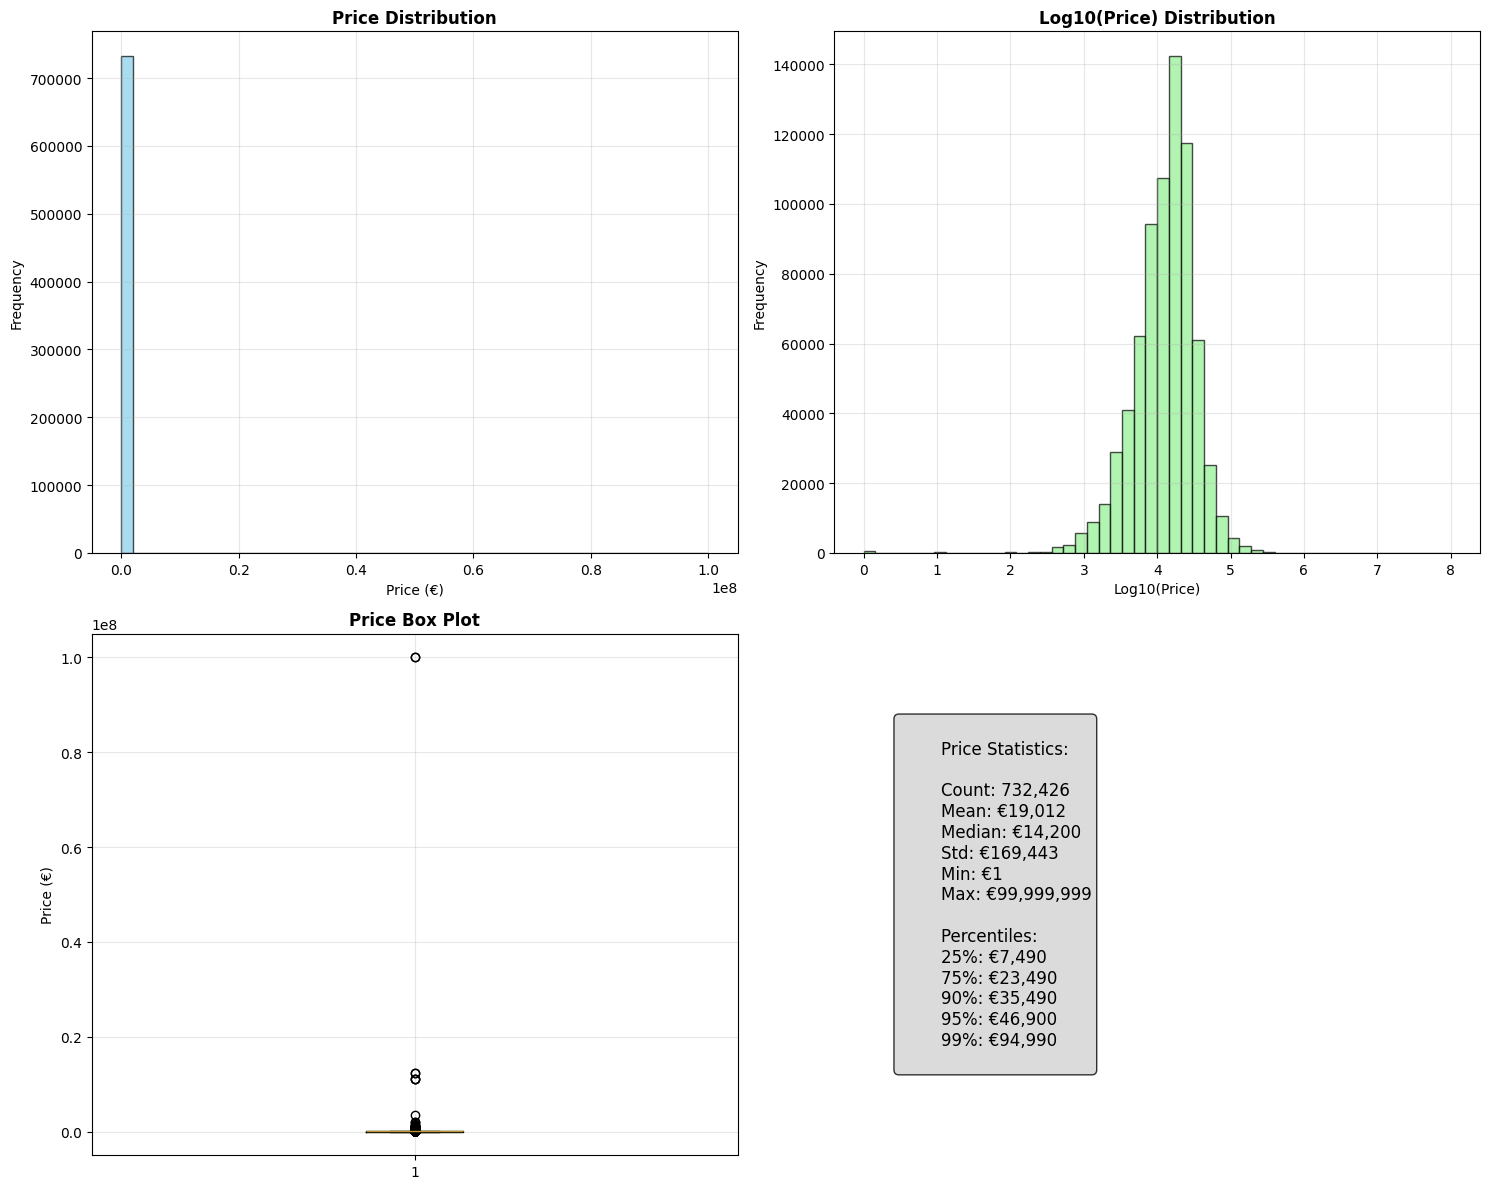


🚨 Price Outliers (IQR method):
   Lower bound: €-16,510
   Upper bound: €47,490
   Number of outliers: 35,322 (4.8%)


In [25]:
# Visualize target variable (price) distribution
print("\n📈 TARGET VARIABLE ANALYSIS: PRICE")
print("=" * 50)

# Clean price data for analysis
try:
    # Handle price as string with potential formatting
    price_clean = df
    
    price_data = price_clean['price_numeric'].drop_nulls()
    
    if price_data.len() > 0:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Convert to pandas for easier plotting
        #price_pd = price_data.to_pandas()
        
        # Price distribution
        axes[0, 0].hist(price_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_title('Price Distribution', fontweight='bold')
        axes[0, 0].set_xlabel('Price (€)')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Log price distribution (if positive values)
        if (price_data > 0).any():
            log_price = np.log10(price_data)
            axes[0, 1].hist(log_price, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
            axes[0, 1].set_title('Log10(Price) Distribution', fontweight='bold')
            axes[0, 1].set_xlabel('Log10(Price)')
            axes[0, 1].set_ylabel('Frequency')
            axes[0, 1].grid(True, alpha=0.3)
        
        # Box plot
        axes[1, 0].boxplot(price_data, vert=True)
        axes[1, 0].set_title('Price Box Plot', fontweight='bold')
        axes[1, 0].set_ylabel('Price (€)')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Price statistics
        axes[1, 1].axis('off')
        stats_text = f"""
        Price Statistics:
        
        Count: {len(price_data):,}
        Mean: €{price_data.mean():,.0f}
        Median: €{price_data.median():,.0f}
        Std: €{price_data.std():,.0f}
        Min: €{price_data.min():,.0f}
        Max: €{price_data.max():,.0f}
        
        Percentiles:
        25%: €{price_data.quantile(0.25):,.0f}
        75%: €{price_data.quantile(0.75):,.0f}
        90%: €{price_data.quantile(0.90):,.0f}
        95%: €{price_data.quantile(0.95):,.0f}
        99%: €{price_data.quantile(0.99):,.0f}
        """
        axes[1, 1].text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center', 
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        Q1 = price_data.quantile(0.25)
        Q3 = price_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = price_data.filter(
        (price_data < lower_bound) | (price_data > upper_bound)
        )
        print(f"\n🚨 Price Outliers (IQR method):")
        print(f"   Lower bound: €{lower_bound:,.0f}")
        print(f"   Upper bound: €{upper_bound:,.0f}")
        print(f"   Number of outliers: {len(outliers):,} ({len(outliers)/len(price_data)*100:.1f}%)")

    else:
        print("❌ No valid price data found for analysis")
        
except Exception as e:
    print(f"❌ Error analyzing price data: {e}")
    print("Raw price sample:", df['price'].head(10).to_list())


🚗 MARQUE (Brand) Analysis:
Total unique brands: 146
Top 10 brands by frequency:
  1. PEUGEOT: 110,246 cars, avg price: €12,657
  2. RENAULT: 97,196 cars, avg price: €12,932
  3. CITROEN: 63,678 cars, avg price: €11,917
  4. VOLKSWAGEN: 57,737 cars, avg price: €18,405
  5. BMW: 48,326 cars, avg price: €24,419
  6. MERCEDES-BENZ: 44,071 cars, avg price: €28,533
  7. AUDI: 43,577 cars, avg price: €25,139
  8. FORD: 28,610 cars, avg price: €17,352
  9. OPEL: 19,869 cars, avg price: €10,834
  10. TOYOTA: 19,736 cars, avg price: €19,544


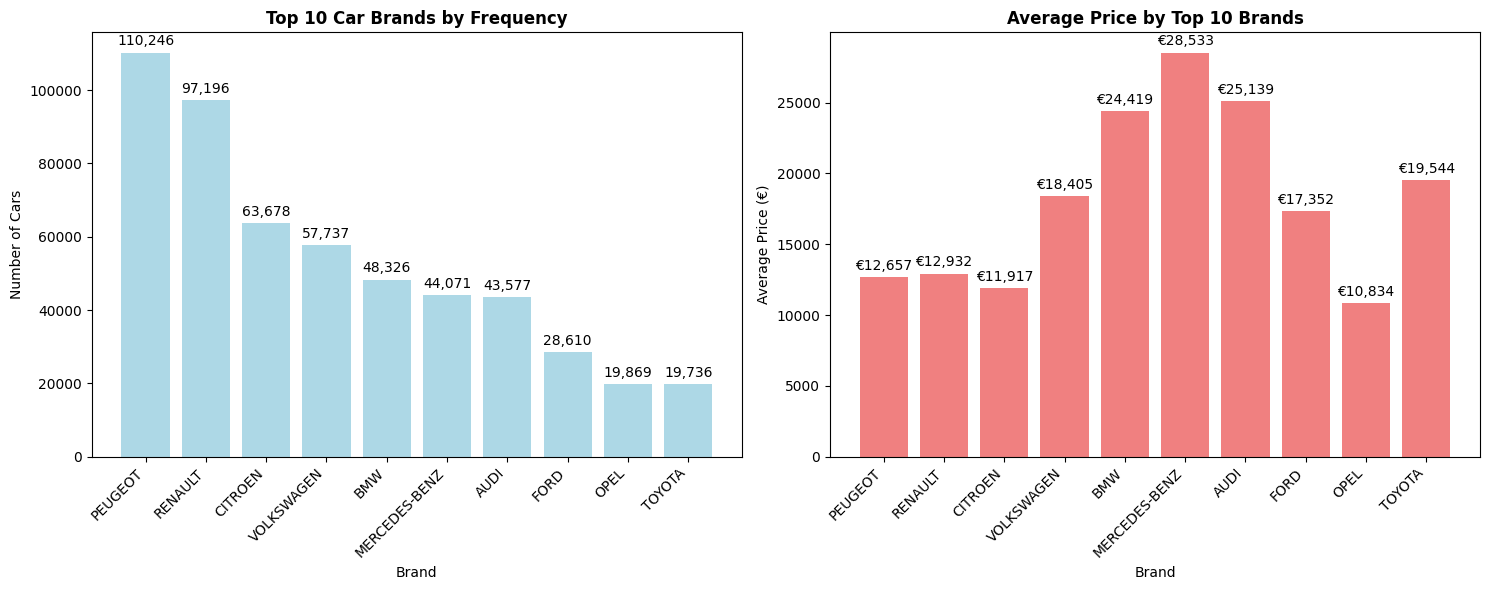

In [41]:
# Analyze marque (brand)

analysis_df = df
print("\n🚗 MARQUE (Brand) Analysis:")
marque_stats = analysis_df.group_by('marque').agg([
    pl.len().alias('count'),
    pl.col('price_numeric').mean().alias('avg_price'),
    pl.col('price_numeric').median().alias('median_price'),
    pl.col('price_numeric').min().alias('min_price'),
    pl.col('price_numeric').max().alias('max_price')
]).sort('count', descending=True)

print(f"Total unique brands: {marque_stats.height}")
print("Top 10 brands by frequency:")
top_brands = marque_stats.head(10)
for i in range(top_brands.height):
    brand = top_brands['marque'][i]
    count = top_brands['count'][i]
    avg_price = top_brands['avg_price'][i]
    print(f"  {i+1}. {brand}: {count:,} cars, avg price: €{avg_price:,.0f}")

# Visualize top brands
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Brand frequency
top_10_brands = marque_stats.head(10)
brands = top_10_brands['marque'].to_list()
counts = top_10_brands['count'].to_list()

ax1.bar(range(len(brands)), counts, color='lightblue')
ax1.set_title('Top 10 Car Brands by Frequency', fontweight='bold')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Number of Cars')
ax1.set_xticks(range(len(brands)))
ax1.set_xticklabels(brands, rotation=45, ha='right')

# Add value labels
for i, v in enumerate(counts):
    ax1.text(i, v + max(counts) * 0.01, f'{v:,}', ha='center', va='bottom')

# Average price by brand
avg_prices = top_10_brands['avg_price'].to_list()
ax2.bar(range(len(brands)), avg_prices, color='lightcoral')
ax2.set_title('Average Price by Top 10 Brands', fontweight='bold')
ax2.set_xlabel('Brand')
ax2.set_ylabel('Average Price (€)')
ax2.set_xticks(range(len(brands)))
ax2.set_xticklabels(brands, rotation=45, ha='right')

# Add value labels
for i, v in enumerate(avg_prices):
    ax2.text(i, v + max(avg_prices) * 0.01, f'€{v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [63]:
df = (df.with_columns([
    pl.col("annee_modele")
      .cast(pl.Float64, strict=False)
      .alias("year_numeric"),

    pl.col("kilometrage")
      .str.replace_all(",", "")
      .str.replace_all(" ", "")
      .str.replace_all("km", "")
      .cast(pl.Float64, strict=False)
      .alias("km_numeric")
])
.filter(pl.col('price_numeric') < 10e5)
)

Clean numerical data: 732,409 rows

🔗 Correlation Matrix:
               price_numeric  year_numeric  km_numeric
price_numeric          1.000         0.271      -0.403
year_numeric           0.271         1.000      -0.523
km_numeric            -0.403        -0.523       1.000


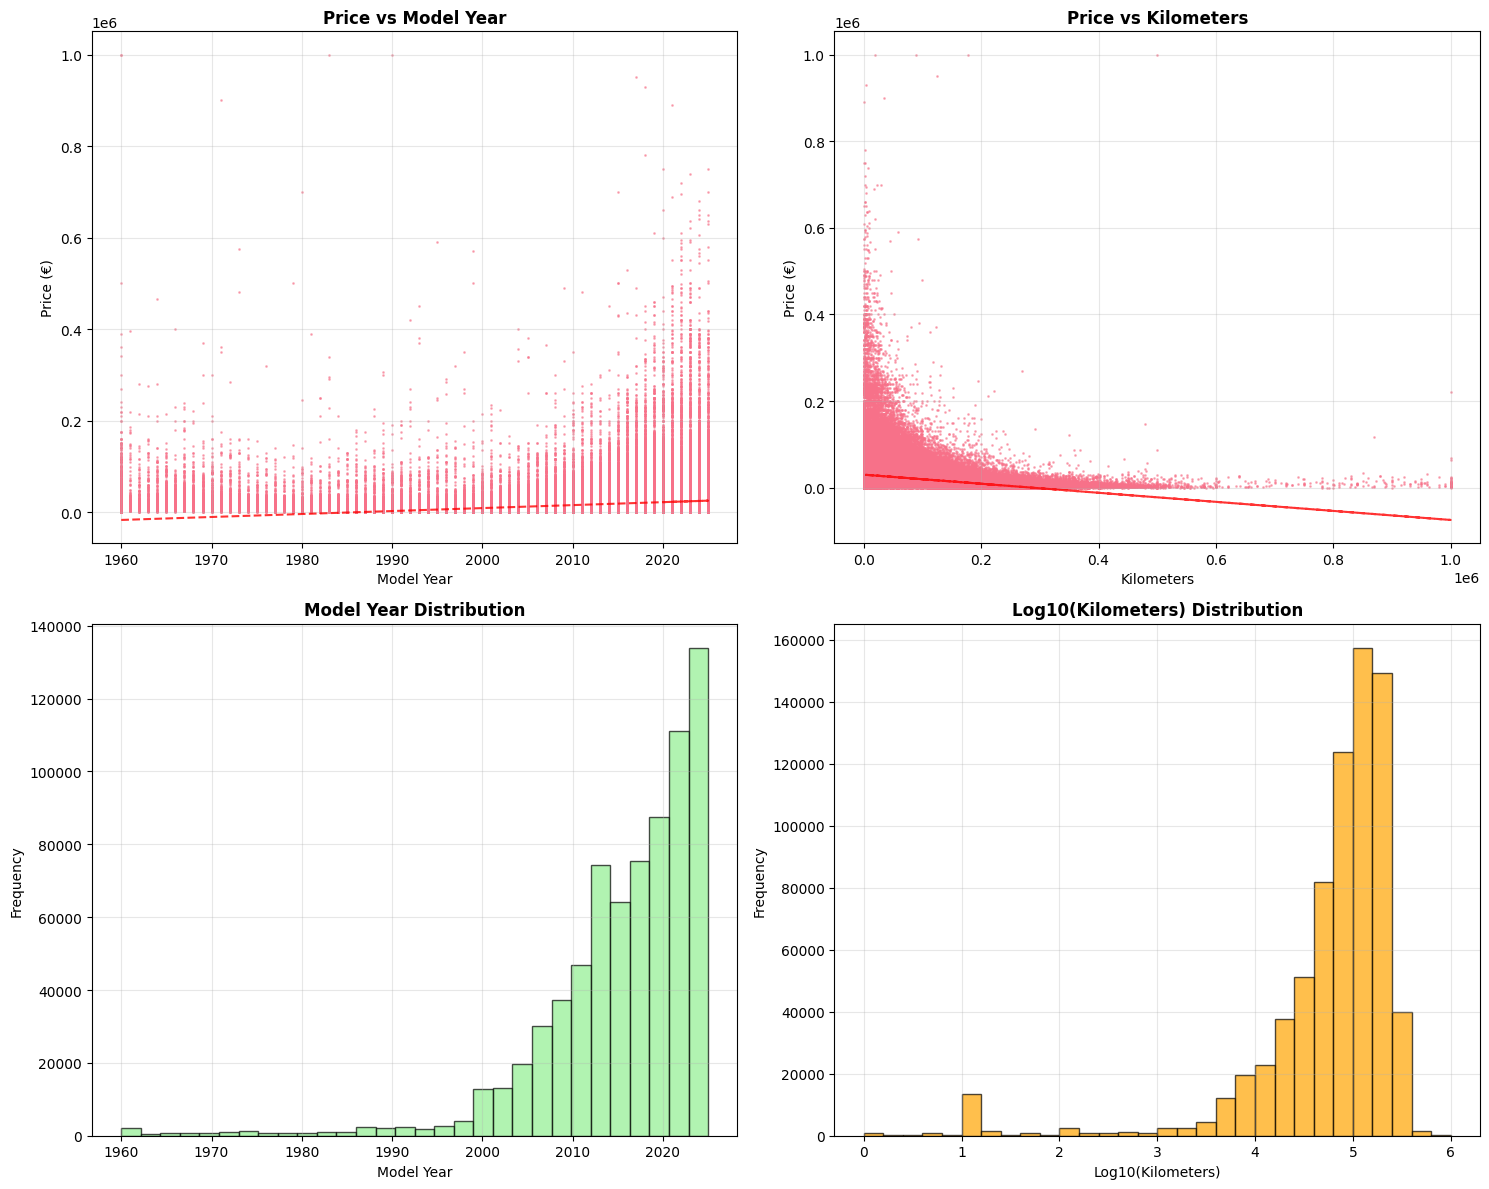


📈 FEATURE STATISTICS:
Model Year:
  Range: 1960 - 2025
  Mean: 2015.4
  Median: 2018

Kilometers:
  Range: 0 - 999,999
  Mean: 108,516
  Median: 95,000

🔗 Key Correlations with Price:
  Price ↔ Model Year: 0.271 (Weak)
  Price ↔ Kilometers: -0.403 (Moderate negative)


In [64]:
# Clean numerical features
numerical_df = df

print(f"Clean numerical data: {numerical_df.height:,} rows")
    
# Convert to pandas for correlation analysis
num_data = numerical_df.select(['price_numeric', 'year_numeric', 'km_numeric']).to_pandas()

# Correlation analysis
correlation_matrix = num_data.corr()
print("\n🔗 Correlation Matrix:")
print(correlation_matrix.round(3))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Price vs Year
axes[0, 0].scatter(num_data['year_numeric'], num_data['price_numeric'], alpha=0.5, s=1)
axes[0, 0].set_title('Price vs Model Year', fontweight='bold')
axes[0, 0].set_xlabel('Model Year')
axes[0, 0].set_ylabel('Price (€)')
axes[0, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(num_data['year_numeric'], num_data['price_numeric'], 1)
p = np.poly1d(z)
axes[0, 0].plot(num_data['year_numeric'], p(num_data['year_numeric']), "r--", alpha=0.8)

# Price vs Kilometers
axes[0, 1].scatter(num_data['km_numeric'], num_data['price_numeric'], alpha=0.5, s=1)
axes[0, 1].set_title('Price vs Kilometers', fontweight='bold')
axes[0, 1].set_xlabel('Kilometers')
axes[0, 1].set_ylabel('Price (€)')
axes[0, 1].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(num_data['km_numeric'], num_data['price_numeric'], 1)
p = np.poly1d(z)
axes[0, 1].plot(num_data['km_numeric'], p(num_data['km_numeric']), "r--", alpha=0.8)

# Year distribution
axes[1, 0].hist(num_data['year_numeric'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Model Year Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Model Year')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Kilometers distribution (log scale for better visualization)
axes[1, 1].hist(np.log10(num_data['km_numeric'][num_data['km_numeric'] > 0]), bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1, 1].set_title('Log10(Kilometers) Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Log10(Kilometers)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature statistics
print(f"\n📈 FEATURE STATISTICS:")
print(f"Model Year:")
print(f"  Range: {num_data['year_numeric'].min():.0f} - {num_data['year_numeric'].max():.0f}")
print(f"  Mean: {num_data['year_numeric'].mean():.1f}")
print(f"  Median: {num_data['year_numeric'].median():.0f}")

print(f"\nKilometers:")
print(f"  Range: {num_data['km_numeric'].min():,.0f} - {num_data['km_numeric'].max():,.0f}")
print(f"  Mean: {num_data['km_numeric'].mean():,.0f}")
print(f"  Median: {num_data['km_numeric'].median():,.0f}")

# Correlation insights
price_year_corr = correlation_matrix.loc['price_numeric', 'year_numeric']
price_km_corr = correlation_matrix.loc['price_numeric', 'km_numeric']

print(f"\n🔗 Key Correlations with Price:")
print(f"  Price ↔ Model Year: {price_year_corr:.3f} {'(Strong positive)' if price_year_corr > 0.7 else '(Moderate positive)' if price_year_corr > 0.3 else '(Weak)'}")
print(f"  Price ↔ Kilometers: {price_km_corr:.3f} {'(Strong negative)' if price_km_corr < -0.7 else '(Moderate negative)' if price_km_corr < -0.3 else '(Weak)'}")

In [74]:
# Assess data quality for modeling variables
modeling_quality = df.select(MODEL_VARS)

print("📊 Data Quality Summary:")
quality_summary = []

for var in MODEL_VARS:
    total_count = modeling_quality.height
    null_count = modeling_quality[var].null_count()
    non_null_count = total_count - null_count
    completeness = (non_null_count / total_count) * 100
    
    quality_summary.append({
        'Variable': var,
        'Total Rows': f"{total_count:,}",
        'Non-Null': f"{non_null_count:,}",
        'Missing': f"{null_count:,}",
        'Completeness (%)': f"{completeness:.1f}%"
    })

quality_df = pd.DataFrame(quality_summary)
print(quality_df.to_string(index=False))

# Calculate rows with complete data
complete_cases = modeling_quality.filter(
        pl.all_horizontal([pl.col(var).is_not_null() for var in MODEL_VARS])
    )

print(f"\n✅ Complete cases (no missing values): {complete_cases.height:,} rows")
print(f"📊 Usable data percentage: {(complete_cases.height / modeling_quality.height) * 100:.1f}%")
# Data type issues
print(f"\n🔍 Data Type Assessment:")
for var in MODEL_VARS:
    dtype = modeling_quality[var].dtype
    print(f"  {var}: {dtype}")
    
    if var in ['price', 'annee_modele', 'kilometrage'] and dtype == pl.String:
        print(f"    ⚠️  Should be numeric - conversion needed")
    elif var in ['marque', 'modele'] and dtype != pl.String:
        print(f"    ⚠️  Should be string/categorical")

print(f"\n💡 MODELING RECOMMENDATIONS:")
print("=" * 40)

print("🔧 Data Preprocessing Steps:")
print("  1. Handle missing values:")
for var in MODEL_VARS:
    null_pct = (modeling_quality[var].null_count() / modeling_quality.height) * 100
    if null_pct > 0:
        if var == 'price':
            print(f"     - {var}: Remove rows (target variable)")
        elif null_pct < 5:
            print(f"     - {var}: Impute or remove ({null_pct:.1f}% missing)")
        else:
            print(f"     - {var}: Consider imputation strategy ({null_pct:.1f}% missing)")

print("\n  2. Data type conversions:")
print("     - Convert price to numeric (remove currency symbols)")
print("     - Convert kilometrage to numeric (remove commas)")
print("     - Ensure annee_modele is numeric")
print("     - Keep marque and modele as categorical")

print("\n  3. Feature engineering opportunities:")
print("     - Create car age from annee_modele")
print("     - Bin kilometrage into categories (low, medium, high)")
print("     - One-hot encode marque and modele")
print("     - Consider brand grouping for rare brands")

print("\n  4. Outlier handling:")
print("     - Review extreme price values")
print("     - Check unrealistic kilometrage (very low/high)")
print("     - Validate model years (future dates, very old cars)")

print("\n📈 Expected Model Performance:")
if complete_cases.height > 1000:
    print("  ✅ Sufficient data for machine learning")
    print("  ✅ Good mix of categorical and numerical features")
    print("  ✅ Clear target variable (price)")
    print("  ⚠️  Consider feature engineering for better performance")
else:
    print("  ⚠️  Limited data - consider gathering more samples")

print(f"\n🎯 Next Steps:")
print("  1. Clean and preprocess the data")
print("  2. Split into train/validation/test sets")
print("  3. Start with simple models (Linear Regression)")
print("  4. Progress to ensemble methods (XGBoost, LightGBM)")
print("  5. Use cross-validation for model selection")
print("  6. Feature importance analysis with SHAP")

📊 Data Quality Summary:
    Variable Total Rows Non-Null Missing Completeness (%)
       price    732,409  732,409       0           100.0%
      marque    732,409  732,409       0           100.0%
      modele    732,409  732,409       0           100.0%
annee_modele    732,409  732,409       0           100.0%
 kilometrage    732,409  732,409       0           100.0%

✅ Complete cases (no missing values): 732,409 rows
📊 Usable data percentage: 100.0%

🔍 Data Type Assessment:
  price: String
    ⚠️  Should be numeric - conversion needed
  marque: String
  modele: String
  annee_modele: String
    ⚠️  Should be numeric - conversion needed
  kilometrage: String
    ⚠️  Should be numeric - conversion needed

💡 MODELING RECOMMENDATIONS:
🔧 Data Preprocessing Steps:
  1. Handle missing values:

  2. Data type conversions:
     - Convert price to numeric (remove currency symbols)
     - Convert kilometrage to numeric (remove commas)
     - Ensure annee_modele is numeric
     - Keep marque an